In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from google.colab import data_table
data_table.enable_dataframe_formatter()
from google.colab import drive

# 1. Data Preprocessing

In [66]:
# Function to preprocess data
def preprocess_data(data):
    data = data.drop(columns=['Quantity', 'Price Tier', 'Ticket Type',
       'Attendee #', 'Group', 'Order Type', 'Currency', 'Total Paid',
       'Fees Paid', 'Eventbrite Fees', 'Eventbrite Payment Processing',
       'Attendee Status', 'College Name',
       'How did you come to know about this event?',
       'Specify in "Others" (how did you come to know about this event)',
       'Designation', 'Year of Graduation'])
    return data

In [67]:
# Load and preprocess training data
placement = pd.read_csv("train_data.csv")
placement_copy = preprocess_data(placement)

# Handling missing values
placement_copy.dropna(subset=['Placement Status'], inplace=True)

# Handling duplicate entries
placement_copy.drop_duplicates(subset=['Email ID'], inplace=True)

# Drop irrelevant columns
placement_copy = placement_copy.drop(columns=['First Name', 'Email ID'])

#Label Encoding Placement Status
label_encoder = LabelEncoder()
placement_copy['Placement Status']= label_encoder.fit_transform(placement_copy['Placement Status'])

In [68]:
placement_copy.head()

,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,6.7,2,5,1
1,8.2,3,2,0
2,6.5,4,3,0
3,8.7,2,5,0
4,9.1,3,5,1


In [69]:
placement_copy.shape

(666, 4)

In [70]:
placement_copy.isnull().sum()

CGPA                0
Speaking Skills     0
ML Knowledge        0
Placement Status    0
dtype: int64

# 2. Data Visualization

Text(0.5, 1.0, 'ML Knowledge')

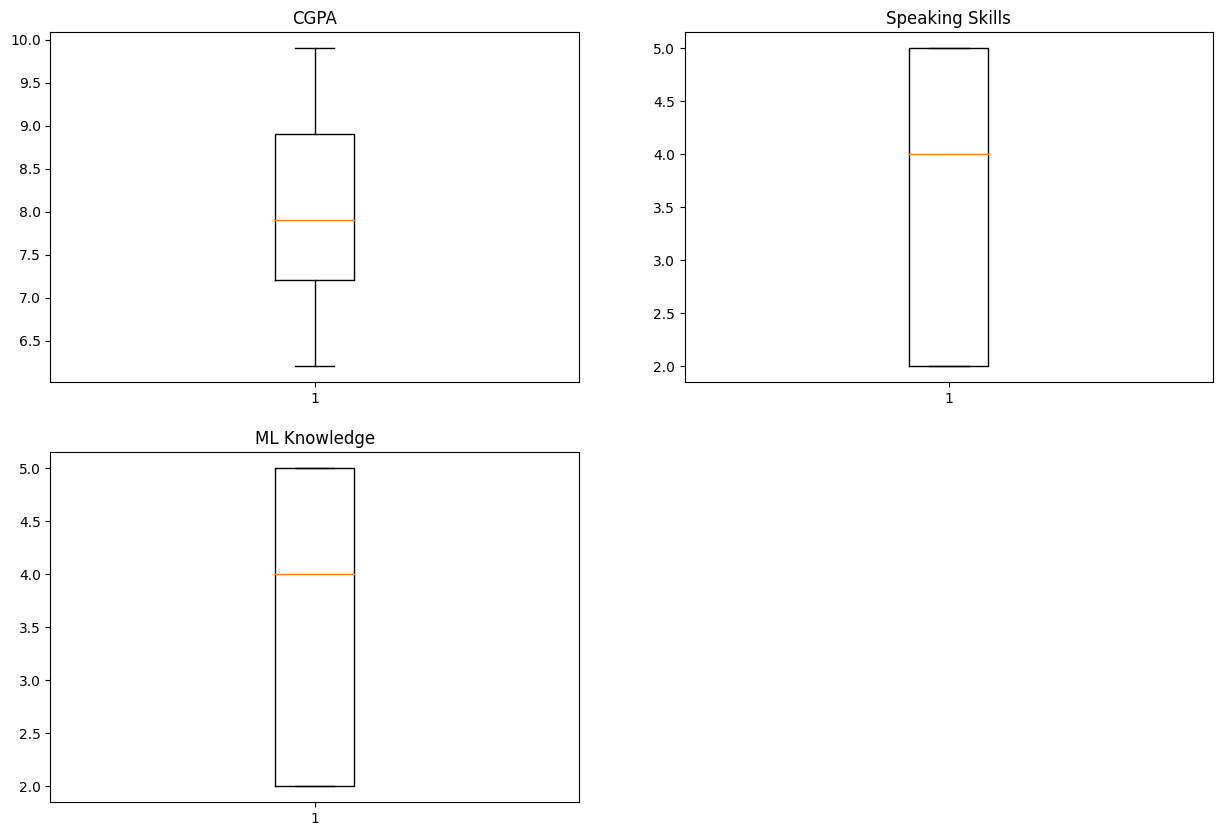

In [71]:
plt.figure(figsize = (15,10))

ax = plt.subplot(221)
plt.boxplot(placement_copy['CGPA'])
ax.set_title('CGPA')

ax = plt.subplot(222)
plt.boxplot(placement_copy['Speaking Skills'])
ax.set_title('Speaking Skills')

ax = plt.subplot(223)
plt.boxplot(placement_copy['ML Knowledge'])
ax.set_title('ML Knowledge')

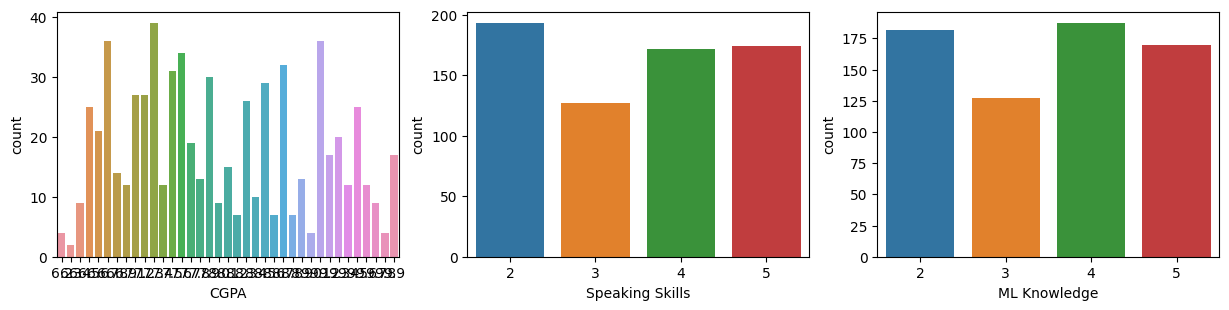

In [72]:
plt.figure(figsize = (15,7))

plt.subplot(231)
ax = sns.countplot(x= 'CGPA' , data = placement_copy)

plt.subplot(232)
ax = sns.countplot(x= 'Speaking Skills' , data = placement_copy)

plt.subplot(233)
ax = sns.countplot(x= 'ML Knowledge' , data = placement_copy)

# 3. Model Training

In [73]:
# Splitting Data
X = placement_copy.drop(['Placement Status'], axis=1)
y = placement_copy['Placement Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

**Logistic Regression**

In [74]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_accuracy = logreg.score(X_test, y_test)
print("Logistic Regression Accuracy:", logreg_accuracy)

Logistic Regression Accuracy: 0.6492537313432836


**Decision Tree**

In [75]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=3)
dt.fit(X_train, y_train)
dt_accuracy = metrics.accuracy_score(y_test, dt.predict(X_test))
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.6567164179104478


**Random Forest**

In [76]:
# Random Forest Classifier
rt = RandomForestClassifier(n_estimators=100, random_state=4)
rt.fit(X_train, y_train)
rt_accuracy = metrics.accuracy_score(y_test, rt.predict(X_test))
print("Random Forest Accuracy:", rt_accuracy)

Random Forest Accuracy: 0.6119402985074627


# 4. Prediction on test data

In [77]:
test_data = pd.read_csv("test_data.csv")

In [78]:
test_data = preprocess_data(test_data)
new_data = test_data.drop(columns = ['First Name', 'Email ID', 'Placement Status'])

In [79]:
new_data.head()

,CGPA,Speaking Skills,ML Knowledge
0,7.8,3,3
1,9.1,3,3
2,6.9,2,2
3,8.4,4,4
4,6.7,5,5


In [80]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X, y)

LogisticRegression(class_weight='balanced')

In [81]:
p = lr.predict(new_data)
prob = lr.predict_proba(new_data)
li = list(p)

In [82]:
test_data['Placement Status'] = p
test_data['Placement Status'] = test_data['Placement Status'].map({0: 'Not Placed', 1: 'Placed'})

In [83]:
test_data.head(666)

,First Name,Email ID,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,Sahil,sahil@xyz.com,7.8,3,3,Not Placed
1,Amrita,amrita@xyz.com,9.1,3,3,Not Placed
2,Mamta,mamta@xyz.com,6.9,2,2,Not Placed
3,Bhagyashri,bhagyashri@xyz.com,8.4,4,4,Placed
4,Divyanshu,divyanshu@xyz.com,6.7,5,5,Placed
...,...,...,...,...,...,...
661,Loida,loida@xyz.com,6.8,2,2,Not Placed
662,Elia,elia@xyz.com,8.4,3,3,Not Placed
663,Miguel,miguel@xyz.com,9.9,2,2,Not Placed
664,Grace,grace@xyz.com,6.6,3,3,Not Placed


# 5. Export the file

In [86]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [87]:
test_data.to_csv('/content/gdrive/My Drive/test_data_predictions.csv', index=False)

In [88]:
test_data_verify = pd.read_csv('/content/gdrive/My Drive/test_data_predictions.csv')
print(test_data_verify)

      First Name            Email ID  CGPA  Speaking Skills  ML Knowledge  \
0         Sahil        sahil@xyz.com   7.8                3             3   
1        Amrita       amrita@xyz.com   9.1                3             3   
2          Mamta       mamta@xyz.com   6.9                2             2   
3     Bhagyashri  bhagyashri@xyz.com   8.4                4             4   
4      Divyanshu   divyanshu@xyz.com   6.7                5             5   
...          ...                 ...   ...              ...           ...   
3791    Saif ali     saifali@xyz.com   9.0                3             2   
3792     Lankesh     lankesh@xyz.com   7.2                4             3   
3793      Sanjay      sanjay@xyz.com   8.5                2             3   
3794    Sushmita    sushmita@xyz.com   6.5                5             5   
3795       Vipul       vipul@xyz.com   6.6                4             5   

     Placement Status  
0          Not Placed  
1          Not Placed  
2  